<a href="https://colab.research.google.com/github/yanirasilva-star/ICD/blob/main/Data_Lead_TG1_final_GRUPO3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introducci√≥n A Ciencia De Datos Y Machine Learning Con Python**

**Integrantes:**



*   Arizaba Garcia Topacio

*   Silva Ruiz Yanira
*   Vega castro Angie


*   Vasquez Milian Andy


**Profesor:** Luis Jose Zapata Bobadilla

**Universidad de Piura**

# **Pregunta**: *¬øCu√°l es la influencia de la tasa de inter√©s de referencia en la din√°mica de la inflaci√≥n en el corto plazo en el Per√∫?* üìà
___

En el Per√∫, la pol√≠tica monetaria juega un rol central en la estabilidad de precios, siendo la Tasa de Pol√≠tica Monetaria (TPM) el principal instrumento utilizado por el Banco Central de Reserva del Per√∫ (BCRP) para influir en la din√°mica de la inflaci√≥n. A trav√©s de cambios en la TPM, el BCRP busca regular las condiciones de liquidez del sistema financiero, lo cual se refleja en variables como la tasa de dep√≥sitos overnight, el saldo de Certificados de Dep√≥sito del BCRP (CDBCR) y las colocaciones en el mercado de dinero. Estas herramientas, junto con la administraci√≥n de los dep√≥sitos del sector p√∫blico, permiten transmitir los efectos de la pol√≠tica monetaria hacia el cr√©dito, el ahorro y, en √∫ltima instancia, hacia el comportamiento de la inflaci√≥n medida por la variaci√≥n mensual del √çndice de Precios al Consumidor (IPC).

El an√°lisis de estas variables mediante boxplots permite observar su comportamiento hist√≥rico, identificar la presencia de valores at√≠picos y evaluar la dispersi√≥n de los datos, lo cual resulta clave para comprender c√≥mo se han ajustado los instrumentos de pol√≠tica monetaria frente a distintos escenarios econ√≥micos. Con ello, se busca responder la pregunta central de este trabajo: ¬øcu√°l es la influencia de la tasa de inter√©s de referencia en la din√°mica de la inflaci√≥n en el corto plazo en el Per√∫?

## **Informaci√≥n antes de la limpieza**

### **1. Definici√≥n del periodo y variables**

 **PERI√ìDO**
* Periodo inicial: **Enero del 2013**
* Periodo final: **Agosto del 2025**

**VARIABLES**
1. PN38705PM: Inflaci√≥n mensual (IPC)
2. PD04722MM: Tasa de inter√©s de referencia (TIR)
3. PN07819NM: Tasa de inter√©s interbancaria promedio
4.  PN06522TM: repo de valores saldo
5. PN06534TM: dep√≥sitos p√∫blicos saldo
6. PN06502OM: CD BCRP - Total - Saldo
7. PN06503OM: CD BCRP - Tasa de √≠nteres - Saldo
8. PN07150NM: Depositos overnight BCRP (promedio diario) - Empresas Bancarias (miles S/)
9. PD04724MM: Tasa de los Dep√≥sitos Overnight en MN

Entre ellas, la inflaci√≥n (IPC) y la tasa de referencia son las variables principales.
Las dem√°s funcionan como canales de transmisi√≥n (tasa interbancaria, dep√≥sitos overnight) o instrumentos operativos (repos, CDBCR, dep√≥sitos).



**Librerias**
  `pandas`, `numpy`y `requests` para hacer petici√≥n a la web.

**Formato:**  se usa `json  `,es la manera m√°s pr√°ctica y est√°ndar de recibir la informaci√≥n y convertirla en objetos de Python para trabajar con ellos.

Realiza una solicitud GET a la API de BCRP utilizando `requests.get()`
Comprueba si la solicitud fue exitosa (c√≥digo de estado 200).
Si la operaci√≥n es correcta, analiza la respuesta JSON en un diccionario de Python y la almacena en la datavariable. De lo contrario, muestra un mensaje de error.





---



In [ ]:
# Primero, importamos las librer√≠as que necesitaremos
import requests  # La librer√≠a est√°ndar en Python para hacer peticiones a la web
import pandas as pd
import numpy as np

# 1. Definimos los par√°metros de nuestra consulta
codigos = 'PN38705PM-PD04722MM-PN07819NM-PN06522TM-PN06534TM-PN06502OM-PN06503OM-PN07150NM-PD04724MM'
formato = 'json' # Pedimos los datos en formato JSON
periodo_inicial = '2013-01'
periodo_final = '2025-08'

# 2. Construimos la URL completa
url = f"https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{codigos}/{formato}/{periodo_inicial}/{periodo_final}"

# 3. Hacemos la petici√≥n GET a la web del BCRP
response = requests.get(url)

# 4. Verificamos que la petici√≥n fue exitosa (un c√≥digo 200 significa que todo sali√≥ bien)
if response.status_code == 200:
    print("¬°Conexi√≥n exitosa con el API del BCRP!")
    # Convertimos la respuesta a un formato de diccionario de Python
    data = response.json()
else:
    print(f"Error al conectar con el API. C√≥digo de estado: {response.status_code}")
    data = None

¬°Conexi√≥n exitosa con el API del BCRP!


### **2.Inspecci√≥n de la estructura de datos sin procesar:**

Antes de convertir los datos a un formato estructurado como un DataFrame de Pandas, inspeccionamos los datos sin procesar recibidos de la API de BCRP para comprender su organizaci√≥n. Esto se realiz√≥ imprimiendo las dos primeras y la √∫ltima entrada de la  lista "periods"  dentro del  objeto "data"  . Esto nos permiti√≥ ver:

*    El formato de la informaci√≥n de fecha (que  m√°s tarde se convertir√≠a en la  columna **'Fecha'**  en nuestro DataFrame).
*  C√≥mo se almacenan   los valores de cada variable (que m√°s tarde llenar√≠an columnas como  **'Tasa\_Ref (%)'** ,  **'IPC'** , etc.) en una lista para cada per√≠odo.
*    El orden en que aparecen estos valores de variable  en la lista para cada per√≠odo, lo cual fue crucial para  extraer y etiquetar correctamente los datos en las columnas apropiadas del DataFrame.

Este paso confirm√≥ que los datos est√°n estructurados como  una lista de per√≠odos, donde cada per√≠odo contiene una fecha y una lista de valores de variables correspondientes en  un orden consistente, prepar√°ndonos para crear nuestro DataFrame estructurado.

In [ ]:
# Miremos los datos de los primeros dos periodos para entender la estructura
# [tasa de inter√©s de ref, tasa de dep√≥sitos overnight, CDBCR total saldo, CDBCR saldo tasa de inter√©s, repos de valores, dep√≥sitos p√∫blicos, dep√≥sitos overnight BCR,  tasa de inter√©s interbancaria, IPC]
if data:
    print(data['periods'][0])
    print(data['periods'][1])
    print(data['periods'][-1])

{'name': 'Ene.2013', 'values': ['4.25', '3.45', '36762.4', '4.053', '0', '0', '367807', '4.1518', '76.3701370802442']}
{'name': 'Feb.2013', 'values': ['4.25', '3.45', '36200.2', '4.03', '0', '0', '47590', '4.2008', '76.301403956872']}
{'name': 'Ago.2025', 'values': ['4.5', '2.5', '43991.9', '4.2065169497112', '7306.947803', '4024.9', '78929.5483870968', '4.5079', '115.586828']}


### **3. Estructuraci√≥n de los datos en un DataFrame:**

Este bloque de c√≥digo se centra en convertir los datos sin procesar , en formato de lista de diccionarios, en  un DataFrame estructurado de Pandas.

As√≠ es como funciona:

* **Inicializaci√≥n de listas:**  Se crean listas vac√≠as para cada variable (p. ej.,  `fechas` ,  `tir` ,  `ipc` ) para almacenar temporalmente los datos extra√≠dos.  
*  **Iteraci√≥n por per√≠odos:**  El c√≥digo recorre cada  `period`  en la  lista `data['periods']`  obtenida de la API de BCRP.  
*  **Extracci√≥n de datos:**  Dentro del bucle:  
    *  Se extrae    la fecha ( `period['name']` ) y se agrega a la  lista `fechas` .
    *  Se extrae   la lista de valores de todas las variables ( `period['values']` ).
    *    Para cada variable, se accede al valor correspondiente desde la  lista `valores`  usando su √≠ndice (seg√∫n el orden de los c√≥digos  en la llamada a la API).
    *    El valor extra√≠do se convierte a un  `float`  si es un n√∫mero v√°lido. Si el valor es 'nd' (que indica no disponible), se reemplaza con  `np.nan`  (no es un n√∫mero) para representar los datos faltantes en el DataFrame .
    *    Estos valores procesados ‚Äã‚Äãse a√±aden a sus respectivas listas.
*  **Creaci√≥n del DataFrame:**  Despu√©s de procesar todos los per√≠odos,   se crea un diccionario `datos_para_df` . Las claves de este diccionario son los nombres de columna deseados para el DataFrame (por ejemplo, 'Fech a', 'Tasa\_Ref (%)'), y los valores son las listas  que contienen los datos extra√≠dos y procesados ‚Äã‚Äãpara cada variable.  
*  **Relleno del DataFrame:** Finalmente,  se crea   un DataFrame de pandas  `df_bcrp` a partir del diccionario `datos_para_df`  . La  l√≠nea `display(df_bcrp.head())`  muestra las primeras filas del DataFrame reci√©n creado, lo que permite una r√°pida verificaci√≥n de  la estructura y los datos.

Este proceso transforma eficazmente los datos sin procesar de la API en un formato tabular limpio, listo para su posterior an√°lisis y visualizaci√≥n en los  pasos posteriores.

In [ ]:
if data:
    # Creamos listas vac√≠as
    fechas = []
    tir = []
    tover = []
    cdbcr_total = []
    cdbcr_tir = []
    repos_valores = []
    depositos_publicos = []
    depositos_overnight = []
    interbancaria = []
    ipc = []
    ipc_variacion = [np.nan]  # Empezamos ipc_variacion con NaN para el primer mes

    # Iteramos sobre los periodos en los datos del BCRP
    for periodo in data['periods']:
        fechas.append(periodo['name'])

        # Los valores vienen en el mismo orden en que pusiste los c√≥digos en la URL:
        # PN38705PM - PD04722MM - PN07839NM - PN06525TM - PN06534TM
        valores = periodo['values']

        # Tasa de inter√©s de referencia
        tir.append(float(valores[0]) if valores[0] != 'n.d.' else np.nan)
        # Depositos overnight
        tover.append(float(valores[1]) if valores[1] != 'n.d.' else np.nan)
        # CDBCR total saldo
        cdbcr_total.append(float(valores[2]) if valores[2] != 'n.d.' else np.nan)
        # CDBCR saldo tasa de inter√©s
        cdbcr_tir.append(float(valores[3]) if valores[3] != 'n.d.' else np.nan)
        # Repos (saldo)
        repos_valores.append(float(valores[4]) if valores[4] != 'n.d.' else np.nan)
        # Dep√≥sitos p√∫blicos (saldo)
        depositos_publicos.append(float(valores[5]) if valores[5] != 'n.d.' else np.nan)
        # Depositos overnight BCR
        depositos_overnight.append(float(valores[6]) if valores[6] != 'n.d.' else np.nan)
        # Tasa interbancaria promedio
        interbancaria.append(float(valores[7]) if valores[7] != 'n.d.' else np.nan)
        # IPC
        ipc.append(float(valores[8]) if valores[8] != 'n.d.' else np.nan)

    # Calculamos la variaci√≥n porcentual mensual del IPC
    for i in range(1, len(ipc)):
        if np.isnan(ipc[i]) or np.isnan(ipc[i-1]):
            ipc_variacion.append(np.nan)
        else:
            variacion = ((ipc[i] - ipc[i-1]) / ipc[i-1]) * 100
            ipc_variacion.append(variacion)

    # Aseguramos que todas las listas tienen la misma longitud
    max_len = len(fechas)  # Esto deber√≠a ser el tama√±o correcto
    while len(ipc_variacion) < max_len:
        ipc_variacion.append(np.nan)  # Rellenamos con NaN si es necesario

    # Construimos el DataFrame
    datos_para_df = {
        'Fecha': fechas,
        'Tasa_Ref (%)': tir,
        'Tasa_Depositos_Overnight (%)': tover,
        'CDBCR_Total_Saldo (S/ millones)': cdbcr_total,
        'CDBCR_Saldo_TIR (%)': cdbcr_tir,
        'Repos_Valores (S/ millones)': repos_valores,
        'Depositos_Publicos_Saldo (S/ millones)': depositos_publicos,
        'Depositos_Overnight_BCR (S/ miles)': depositos_overnight,
        'Tasa_Interbancaria (%)': interbancaria,
        'IPC': ipc,
        'Variaci√≥n_Porcentual_IPC': ipc_variacion,
    }

    df_bcrp = pd.DataFrame(datos_para_df)

    print("DataFrame creado exitosamente:")
    display(df_bcrp.head())
else:
    print("No se pudieron cargar los datos para crear el DataFrame.")

DataFrame creado exitosamente:


Fecha  Tasa_Ref (%)  Tasa_Depositos_Overnight (%)  \
0  Ene.2013          4.25                          3.45   
1  Feb.2013          4.25                          3.45   
2  Mar.2013          4.25                          3.45   
3  Abr.2013          4.25                          3.45   
4  May.2013          4.25                          3.45   

   CDBCR_Total_Saldo (S/ millones)  CDBCR_Saldo_TIR (%)  \
0                          36762.4                4.053   
1                          36200.2                4.030   
2                          36034.7                3.960   
3                          37175.0                3.970   
4                          33493.0                3.860   

   Repos_Valores (S/ millones)  Depositos_Publicos_Saldo (S/ millones)  \
0                          0.0                                     0.0   
1                          0.0                                     0.0   
2                          0.0                                     0.0   
3                          0.0                                     0.0   
4                          0.0                                     0.0   

   Depositos_Overnight_BCR (S/ miles)  Tasa_Interbancaria (%)        IPC  \
0                            367807.0                  4.1518  76.370137   
1                             47590.0                  4.2008  76.301404   
2                            201773.0                  4.2404  76.994851   
3                            122430.0                  4.2005  77.189176   
4                             23520.0                  4.2542  77.338603   

   Variaci√≥n_Porcentual_IPC  
0                       NaN  
1                 -0.090000  
2                  0.908826  
3                  0.252386  
4                  0.193586

###**4. Informaci√≥n descriptiva de la data**

In [ ]:
df_bcrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Fecha                                   152 non-null    object 
 1   Tasa_Ref (%)                            152 non-null    float64
 2   Tasa_Depositos_Overnight (%)            152 non-null    float64
 3   CDBCR_Total_Saldo (S/ millones)         152 non-null    float64
 4   CDBCR_Saldo_TIR (%)                     152 non-null    float64
 5   Repos_Valores (S/ millones)             152 non-null    float64
 6   Depositos_Publicos_Saldo (S/ millones)  152 non-null    float64
 7   Depositos_Overnight_BCR (S/ miles)      152 non-null    float64
 8   Tasa_Interbancaria (%)                  152 non-null    float64
 9   IPC                                     152 non-null    float64
 10  Variaci√≥n_Porcentual_IPC                151 non-null    float

In [ ]:
df_bcrp.describe()

Tasa_Ref (%)  Tasa_Depositos_Overnight (%)  \
count    152.000000                    152.000000   
mean       3.797697                      2.486513   
std        1.932369                      1.348496   
min        0.250000                      0.150000   
25%        2.750000                      1.500000   
50%        4.000000                      2.500000   
75%        4.500000                      3.250000   
max        7.750000                      5.250000   

       CDBCR_Total_Saldo (S/ millones)  CDBCR_Saldo_TIR (%)  \
count                       152.000000           152.000000   
mean                      33746.351974             3.846919   
std                       14455.399160             1.769391   
min                       12757.200000             0.364835   
25%                       25491.550000             2.800000   
50%                       30080.050000             3.870000   
75%                       41028.975000             4.666141   
max                       81435.000000             7.571590   

       Repos_Valores (S/ millones)  Depositos_Publicos_Saldo (S/ millones)  \
count                   152.000000                              152.000000   
mean                   5568.983261                             2801.742105   
std                    4366.903163                             2167.146173   
min                       0.000000                                0.000000   
25%                    1900.000000                             1154.750000   
50%                    5054.266810                             2500.100000   
75%                    8485.396000                             4158.825000   
max                   15654.446000                             7044.400000   

       Depositos_Overnight_BCR (S/ miles)  Tasa_Interbancaria (%)         IPC  \
count                        1.520000e+02              152.000000  152.000000   
mean                         8.239607e+05                3.827607   94.137640   
std                          1.257515e+06                1.936193   12.001968   
min                          2.352000e+04                0.110600   76.301404   
25%                          2.531599e+05                2.752650   85.399373   
50%                          4.366190e+05                3.963500   91.465364   
75%                          7.834652e+05                4.533500  104.685598   
max                          8.106778e+06                7.761200  115.923300   

       Variaci√≥n_Porcentual_IPC  
count                151.000000  
mean                   0.275417  
std                    0.343484  
min                   -0.469245  
25%                    0.063155  
50%                    0.225030  
75%                    0.423334  
max                    1.482660

 **Informaci√≥n General:**

 Los principales hallazgos del an√°lisis, basado en las funciones `df_bcrp.info()` y `df_bcrp.describe().`

El DataFrame contiene 173 observaciones y 10 columnas.

**Estad√≠sticas Descriptivas Clave:**

* **Tasa de Referencia (Tasa_Ref %):** Muestra variabilidad esperada con un rango de 0.25% a 7.75% (media de 3.83%), reflejando ajustes de pol√≠tica monetaria.

* **IPC**: Presenta un rango amplio (70.95% a 115.92%, media de 91.68%) con una desviaci√≥n est√°ndar notable (13.06), indicando fluctuaciones en la inflaci√≥n, incluyendo picos.

* **Canales de Transmisi√≥n e Instrumentos Operativos:** Tasas como la interbancaria y de dep√≥sitos overnight, as√≠ como los saldos de repos y CDBCR, exhiben mayor volatilidad y rangos amplios, especialmente durante per√≠odos de crisis, lo que sugiere su uso activo por parte del BCRP.
Correlaciones: Existe una alta correlaci√≥n entre la Tasa de Referencia y otras tasas de inter√©s (interbancaria, dep√≥sitos overnight, y TIR de CDBCR), confirmando su rol en la transmisi√≥n de la pol√≠tica monetaria. La correlaci√≥n positiva entre Repos y el IPC podr√≠a indicar el uso de liquidez en respuesta a presiones inflacionarias o viceversa.
Conclusi√≥n:

El an√°lisis descriptivo revela que el DataFrame ``df_bcrp contiene informaci√≥n relevante sobre la pol√≠tica monetaria y la inflaci√≥n en Per√∫.

###**5.Limpieza de data**

**5.1 Eliminar datos faltanes:**
Este bloque de c√≥digo se encarga de la limpieza de datos, espec√≠ficamente eliminando filas que contienen valores faltantes (NaN) en cualquier columna del DataFrame `df_bcrp`.


* `df_bcrp.dropna(inplace=True)`Esta l√≠nea elimina cualquier fila del DataFrame df_bcrpque contenga al menos un valor faltante ( NaN).
* `El inplace=True`Modifica el DataFrame directamente sin crear uno nuevo.
`df_bcrp.info()`:Esta l√≠nea muestra luego un resumen conciso del DataFrame modificado.
El resultado `df_bcrp.info()`despu√©s de la ejecuci√≥n `dropna()`muestra la estructura del DataFrame, incluyendo el n√∫mero de entradas (filas) y el recuento de valores no nulos en cada columna. Si el n√∫mero de entradas es menor que el original (que era 188 antes de este paso, como se muestra en el resultado del paso anterior `df_bcrp.info()`), significa que se eliminaron correctamente algunas filas con valores faltantes.






In [ ]:
# Eliminar las filas con valores faltantes en cualquier columna
df_bcrp.dropna(inplace=True)

# Verificar nuevamente el estado del DataFrame
df_bcrp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 1 to 151
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Fecha                                   151 non-null    object 
 1   Tasa_Ref (%)                            151 non-null    float64
 2   Tasa_Depositos_Overnight (%)            151 non-null    float64
 3   CDBCR_Total_Saldo (S/ millones)         151 non-null    float64
 4   CDBCR_Saldo_TIR (%)                     151 non-null    float64
 5   Repos_Valores (S/ millones)             151 non-null    float64
 6   Depositos_Publicos_Saldo (S/ millones)  151 non-null    float64
 7   Depositos_Overnight_BCR (S/ miles)      151 non-null    float64
 8   Tasa_Interbancaria (%)                  151 non-null    float64
 9   IPC                                     151 non-null    float64
 10  Variaci√≥n_Porcentual_IPC                151 non-null    float64
dt

2.2 Columnas irrelevantes

In [ ]:
df_bcrp.describe()

Tasa_Ref (%)  Tasa_Depositos_Overnight (%)  \
count    151.000000                    151.000000   
mean       3.794702                      2.480132   
std        1.938446                      1.350680   
min        0.250000                      0.150000   
25%        2.750000                      1.500000   
50%        4.000000                      2.500000   
75%        4.500000                      3.250000   
max        7.750000                      5.250000   

       CDBCR_Total_Saldo (S/ millones)  CDBCR_Saldo_TIR (%)  \
count                       151.000000           151.000000   
mean                      33726.378146             3.845554   
std                       14501.399129             1.775199   
min                       12757.200000             0.364835   
25%                       25454.800000             2.800000   
50%                       30074.200000             3.870000   
75%                       41029.550000             4.677427   
max                       81435.000000             7.571590   

       Repos_Valores (S/ millones)  Depositos_Publicos_Saldo (S/ millones)  \
count                   151.000000                              151.000000   
mean                   5605.863945                             2820.296689   
std                    4357.619660                             2162.210534   
min                       0.000000                                0.000000   
25%                    1914.266810                             1200.000000   
50%                    5058.533619                             2500.100000   
75%                    8485.446000                             4217.450000   
max                   15654.446000                             7044.400000   

       Depositos_Overnight_BCR (S/ miles)  Tasa_Interbancaria (%)         IPC  \
count                        1.510000e+02              151.000000  151.000000   
mean                         8.269816e+05                3.825460   94.255306   
std                          1.261146e+06                1.942455   11.953621   
min                          2.352000e+04                0.110600   76.301404   
25%                          2.519598e+05                2.752600   85.531378   
50%                          4.367218e+05                3.954000   91.493350   
75%                          7.837235e+05                4.550900  104.931264   
max                          8.106778e+06                7.761200  115.923300   

       Variaci√≥n_Porcentual_IPC  
count                151.000000  
mean                   0.275417  
std                    0.343484  
min                   -0.469245  
25%                    0.063155  
50%                    0.225030  
75%                    0.423334  
max                    1.482660

2.3 Filas repetidas

In [ ]:
# Ver las filas duplicadas
duplicadas = df_bcrp[df_bcrp.duplicated()]
print(duplicadas)

Empty DataFrame
Columns: [Fecha, Tasa_Ref (%), Tasa_Depositos_Overnight (%), CDBCR_Total_Saldo (S/ millones), CDBCR_Saldo_TIR (%), Repos_Valores (S/ millones), Depositos_Publicos_Saldo (S/ millones), Depositos_Overnight_BCR (S/ miles), Tasa_Interbancaria (%), IPC, Variaci√≥n_Porcentual_IPC]
Index: []


### **6. Detecci√≥n de Posibles Outliers**

Este bloque de c√≥digo tiene como objetivo **identificar posibles valores at√≠picos (outliers)** en las columnas num√©ricas del DataFrame `df_bcrp` utilizando el m√©todo del **Rango Intercuart√≠lico (IQR)**.

- **`columnas_numericas = df_bcrp.select_dtypes(include=['float64', 'int64'])`**  
  Selecciona solo las columnas num√©ricas (`float64` o `int64`) del DataFrame `df_bcrp` y las guarda en `columnas_numericas`.  
  Esto es necesario porque el c√°lculo de outliers basado en IQR solo es aplicable a datos num√©ricos.

- **`Q1 = columnas_numericas.quantile(0.25)`**  
  Calcula el **primer cuartil (Q1)** para cada columna num√©rica.  
  El Q1 representa el valor por debajo del cual se encuentra el 25 % de los datos.

- **`Q3 = columnas_numericas.quantile(0.75)`**  
  Calcula el **tercer cuartil (Q3)** para cada columna num√©rica.  
  El Q3 representa el valor por debajo del cual se encuentra el 75 % de los datos.

- **`IQR = Q3 - Q1`**  
  Calcula el **Rango Intercuart√≠lico (IQR)**, que es la diferencia entre Q3 y Q1.  
  El IQR mide la dispersi√≥n de la mitad central de los datos.

- **`outliers = ((columnas_numericas < (Q1 - 1.5 * IQR)) | (columnas_numericas > (Q3 + 1.5 * IQR))).sum()`**  
  Detecta los posibles outliers.  
  Se considera un rango "normal" para los datos: `[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]`.  
  Cualquier valor fuera de este rango se considera un posible outlier.  
  La expresi√≥n genera un DataFrame con `True` donde hay un outlier y `False` en caso contrario.  
  El `.sum()` cuenta la cantidad de `True` en cada columna (cantidad de outliers).


In [ ]:
# Seleccionar solo las columnas num√©ricas
columnas_numericas = df_bcrp.select_dtypes(include=['float64', 'int64'])

# Calcular el IQR solo para las columnas num√©ricas
Q1 = columnas_numericas.quantile(0.25)
Q3 = columnas_numericas.quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers
outliers = ((columnas_numericas < (Q1 - 1.5 * IQR)) | (columnas_numericas > (Q3 + 1.5 * IQR))).sum()

# Mostrar el conteo de outliers por variable
print("Cantidad de posibles outliers por variable:")
print(outliers)



Cantidad de posibles outliers por variable:
Tasa_Ref (%)                              12
Tasa_Depositos_Overnight (%)               0
CDBCR_Total_Saldo (S/ millones)           10
CDBCR_Saldo_TIR (%)                        6
Repos_Valores (S/ millones)                0
Depositos_Publicos_Saldo (S/ millones)     0
Depositos_Overnight_BCR (S/ miles)        18
Tasa_Interbancaria (%)                    11
IPC                                        0
Variaci√≥n_Porcentual_IPC                   7
dtype: int64


### **7. Graficos**

### **7.1 Boxplots**



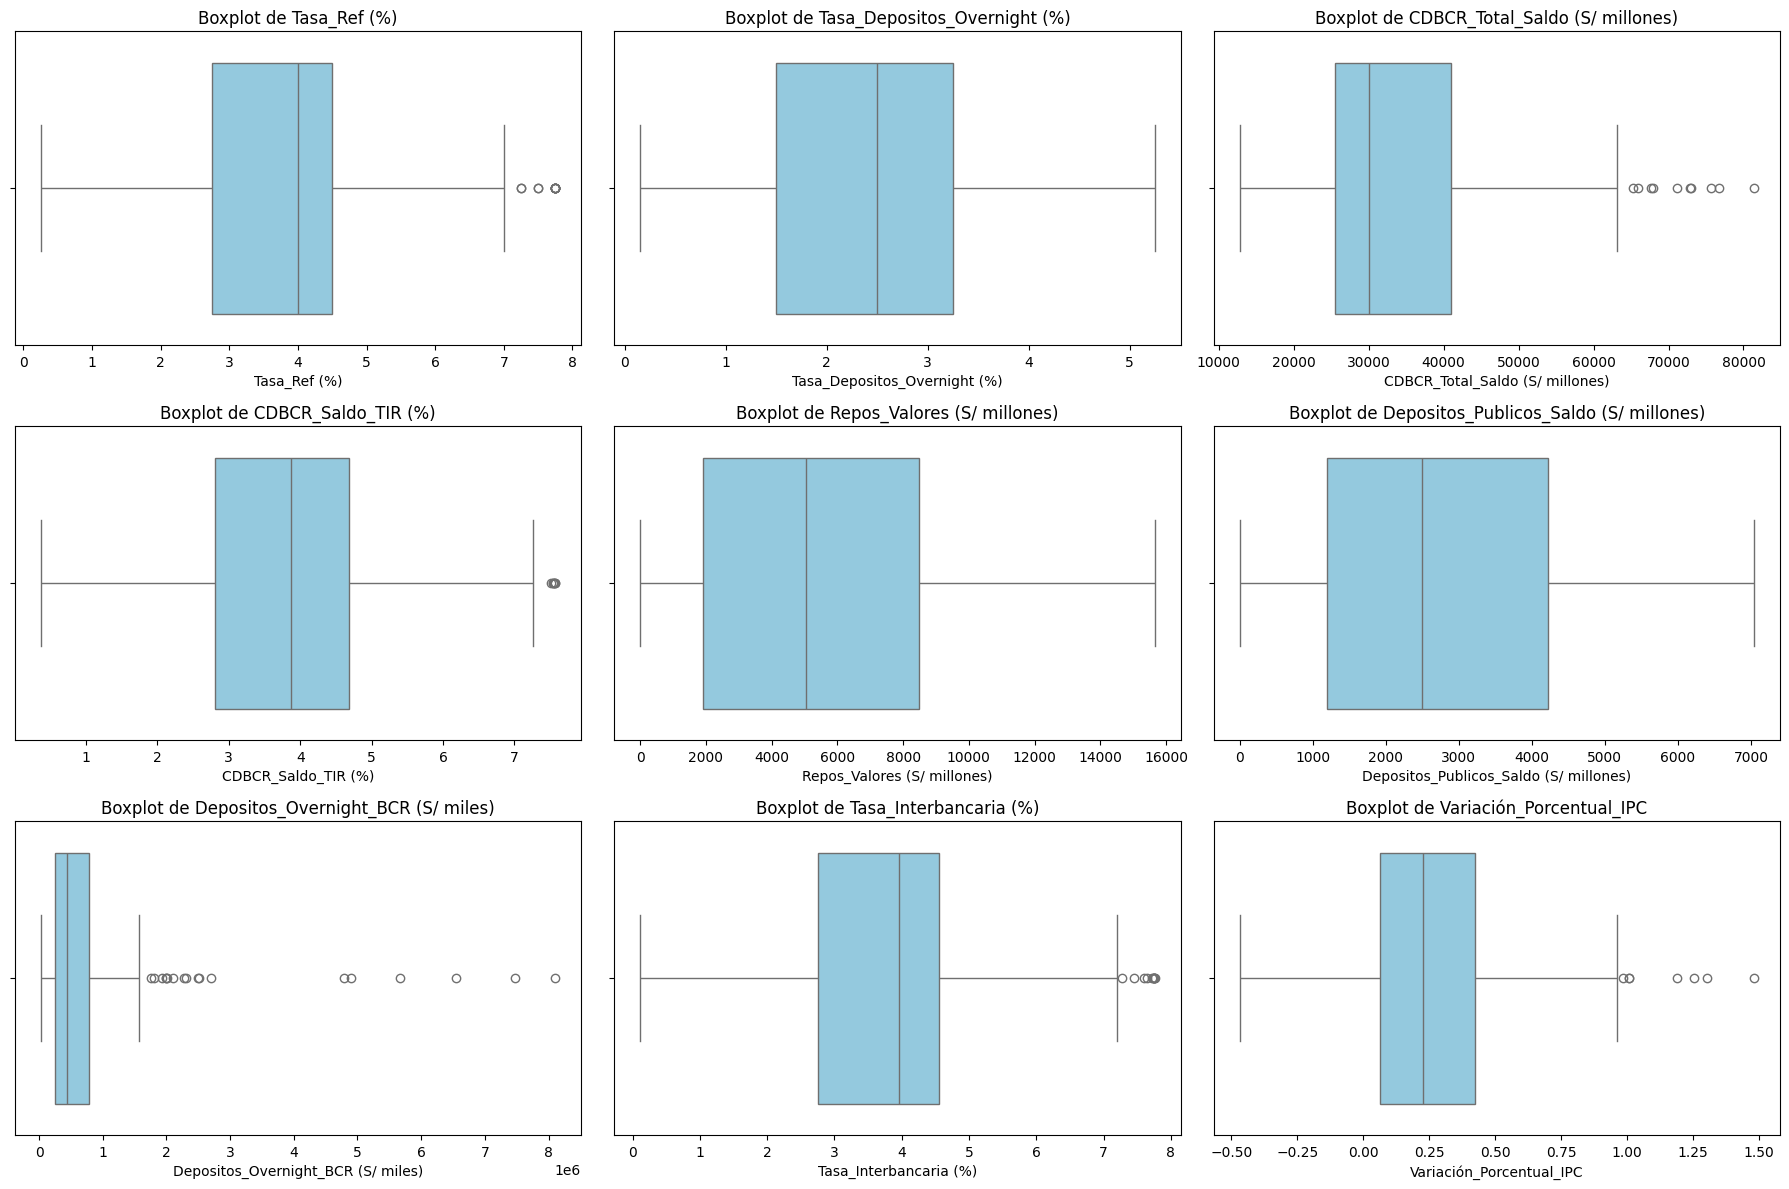

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = [col for col in columnas_numericas.columns if col != "IPC"]

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(x=df_bcrp[var], ax=axes[i], color="skyblue")  # <- azulito
    axes[i].set_title(f'Boxplot de {var}')

for j in range(len(variables), 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


1. Tasa de Referencia (%)

El boxplot muestra que la tasa de referencia del BCRP se ha mantenido en un rango relativamente acotado, alrededor de 3%‚Äì4% la mayor parte del tiempo, con algunos outliers en niveles m√°s altos (7%‚Äì8%). Esto refleja que el BCRP ajusta esta tasa de manera discreta y estrat√©gica como instrumento principal de pol√≠tica monetaria, elev√°ndola en episodios de presiones inflacionarias y reduci√©ndola en contextos de crisis o recesi√≥n, como ocurri√≥ en la pandemia. Su rol central es anclar las expectativas y guiar el resto de tasas de la econom√≠a.

2. Tasa de Dep√≥sitos Overnight (%)

Este boxplot revela una dispersi√≥n similar a la de la tasa de referencia, aunque con mayor variabilidad en los extremos. Al ser una tasa de muy corto plazo, suele ajustarse casi de manera inmediata a los cambios en la tasa de referencia, reflejando la efectividad del canal de transmisi√≥n de pol√≠tica monetaria en el segmento overnight. Su cercan√≠a a la tasa de referencia indica que los bancos responden r√°pidamente a las se√±ales del BCRP para regular su liquidez diaria.

3. CDBCR ‚Äì Total Saldo (S/ millones)

En este caso, el boxplot muestra una concentraci√≥n en torno a 30‚Äì40 mil millones, pero con varios outliers hacia niveles m√°s altos (60‚Äì80 mil millones). Esto evidencia que el BCRP utiliza los Certificados de Dep√≥sito (CDBCR) como un mecanismo operativo para absorber liquidez del sistema financiero, ajustando la cantidad seg√∫n las condiciones monetarias. Los valores extremos corresponden a periodos de fuerte intervenci√≥n, lo que refleja que este instrumento complementa el ajuste de tasas de referencia para mantener la estabilidad monetaria.

4. CDBCR ‚Äì Saldo TIR (%)

El boxplot de la tasa de inter√©s de los CDBCR muestra que suele moverse en torno al 4%, con outliers en valores m√°s altos. Esto confirma que la tasa de los CDBCR sigue de cerca la tasa de referencia, aunque con algunos episodios de desalineaci√≥n temporal. En t√©rminos de transmisi√≥n monetaria, esta tasa es un puente entre el instrumento de pol√≠tica (tasa de referencia) y las condiciones de liquidez en el mercado financiero.

5. Repos de Valores (S/ millones)

Aqu√≠ observamos una dispersi√≥n amplia, con un rango central de 4‚Äì8 mil millones y algunos valores extremos hacia 15 mil millones. Esto refleja el uso de repos como herramienta del BCRP para inyectar liquidez temporal al sistema bancario, sobre todo en contextos de necesidad de financiamiento de corto plazo. Su variabilidad muestra que, si bien no marcan directamente la direcci√≥n de la pol√≠tica monetaria, cumplen un rol crucial para que los bancos puedan adaptarse a los cambios de tasas de referencia sin desajustes abruptos.

6. Dep√≥sitos P√∫blicos ‚Äì Saldo (S/ millones)

El boxplot presenta un rango en torno a 2‚Äì4 mil millones, con cierta dispersi√≥n. Estos dep√≥sitos constituyen otro mecanismo operativo del BCRP para absorber liquidez, ya que concentran recursos del sector p√∫blico. Aunque no responden de manera directa a la tasa de referencia, complementan la pol√≠tica monetaria al controlar la cantidad de dinero circulante, influyendo indirectamente en las presiones inflacionarias.

7. Dep√≥sitos Overnight BCRP (S/ miles)

En este caso se observa gran dispersi√≥n y numerosos outliers que llegan hasta varios millones. Esto muestra que los bancos recurren al BCRP para colocar excedentes de liquidez de manera muy vol√°til. La amplitud de este rango refleja que el BCRP ajusta din√°micamente la absorci√≥n de liquidez, de acuerdo con la coyuntura. Aunque no es un canal directo hacia la inflaci√≥n, s√≠ influye en la estabilidad de las tasas de corto plazo, reforzando la transmisi√≥n de la tasa de referencia.

8. Tasa Interbancaria (%)

El boxplot refleja que esta tasa se concentra en torno al 3%‚Äì4%, con valores extremos en 7%‚Äì8%. Es clave porque constituye el mecanismo de transmisi√≥n m√°s inmediato de la tasa de referencia: los bancos negocian fondos entre s√≠ a este tipo de inter√©s, y cualquier variaci√≥n de la tasa de referencia se refleja de manera r√°pida aqu√≠. Por ello, la tasa interbancaria es un eslab√≥n fundamental en la cadena de transmisi√≥n de la pol√≠tica monetaria hacia la inflaci√≥n.

9. Variaci√≥n Porcentual IPC

El boxplot de la inflaci√≥n (variaci√≥n mensual del IPC) muestra un rango estrecho en torno a 0.2%‚Äì0.4%, con outliers hacia valores m√°s altos, lo que refleja episodios de choques inflacionarios (como el alza de precios de alimentos y energ√≠a en 2021‚Äì2022). La relativa estabilidad en el rango central sugiere que, a pesar de esos choques, la pol√≠tica monetaria ha contribuido a mantener la inflaci√≥n dentro o cerca del rango meta. Los outliers evidencian los l√≠mites de la pol√≠tica monetaria en el corto plazo frente a shocks externos.

**Informaci√≥n despues de la limpieza**

In [ ]:
df_bcrp.describe()

Tasa_Ref (%)  Tasa_Depositos_Overnight (%)  \
count    151.000000                    151.000000   
mean       3.794702                      2.480132   
std        1.938446                      1.350680   
min        0.250000                      0.150000   
25%        2.750000                      1.500000   
50%        4.000000                      2.500000   
75%        4.500000                      3.250000   
max        7.750000                      5.250000   

       CDBCR_Total_Saldo (S/ millones)  CDBCR_Saldo_TIR (%)  \
count                       151.000000           151.000000   
mean                      33726.378146             3.845554   
std                       14501.399129             1.775199   
min                       12757.200000             0.364835   
25%                       25454.800000             2.800000   
50%                       30074.200000             3.870000   
75%                       41029.550000             4.677427   
max                       81435.000000             7.571590   

       Repos_Valores (S/ millones)  Depositos_Publicos_Saldo (S/ millones)  \
count                   151.000000                              151.000000   
mean                   5605.863945                             2820.296689   
std                    4357.619660                             2162.210534   
min                       0.000000                                0.000000   
25%                    1914.266810                             1200.000000   
50%                    5058.533619                             2500.100000   
75%                    8485.446000                             4217.450000   
max                   15654.446000                             7044.400000   

       Depositos_Overnight_BCR (S/ miles)  Tasa_Interbancaria (%)         IPC  \
count                        1.510000e+02              151.000000  151.000000   
mean                         8.269816e+05                3.825460   94.255306   
std                          1.261146e+06                1.942455   11.953621   
min                          2.352000e+04                0.110600   76.301404   
25%                          2.519598e+05                2.752600   85.531378   
50%                          4.367218e+05                3.954000   91.493350   
75%                          7.837235e+05                4.550900  104.931264   
max                          8.106778e+06                7.761200  115.923300   

       Variaci√≥n_Porcentual_IPC  
count                151.000000  
mean                   0.275417  
std                    0.343484  
min                   -0.469245  
25%                    0.063155  
50%                    0.225030  
75%                    0.423334  
max                    1.482660

### **1.TENDENCIAS**

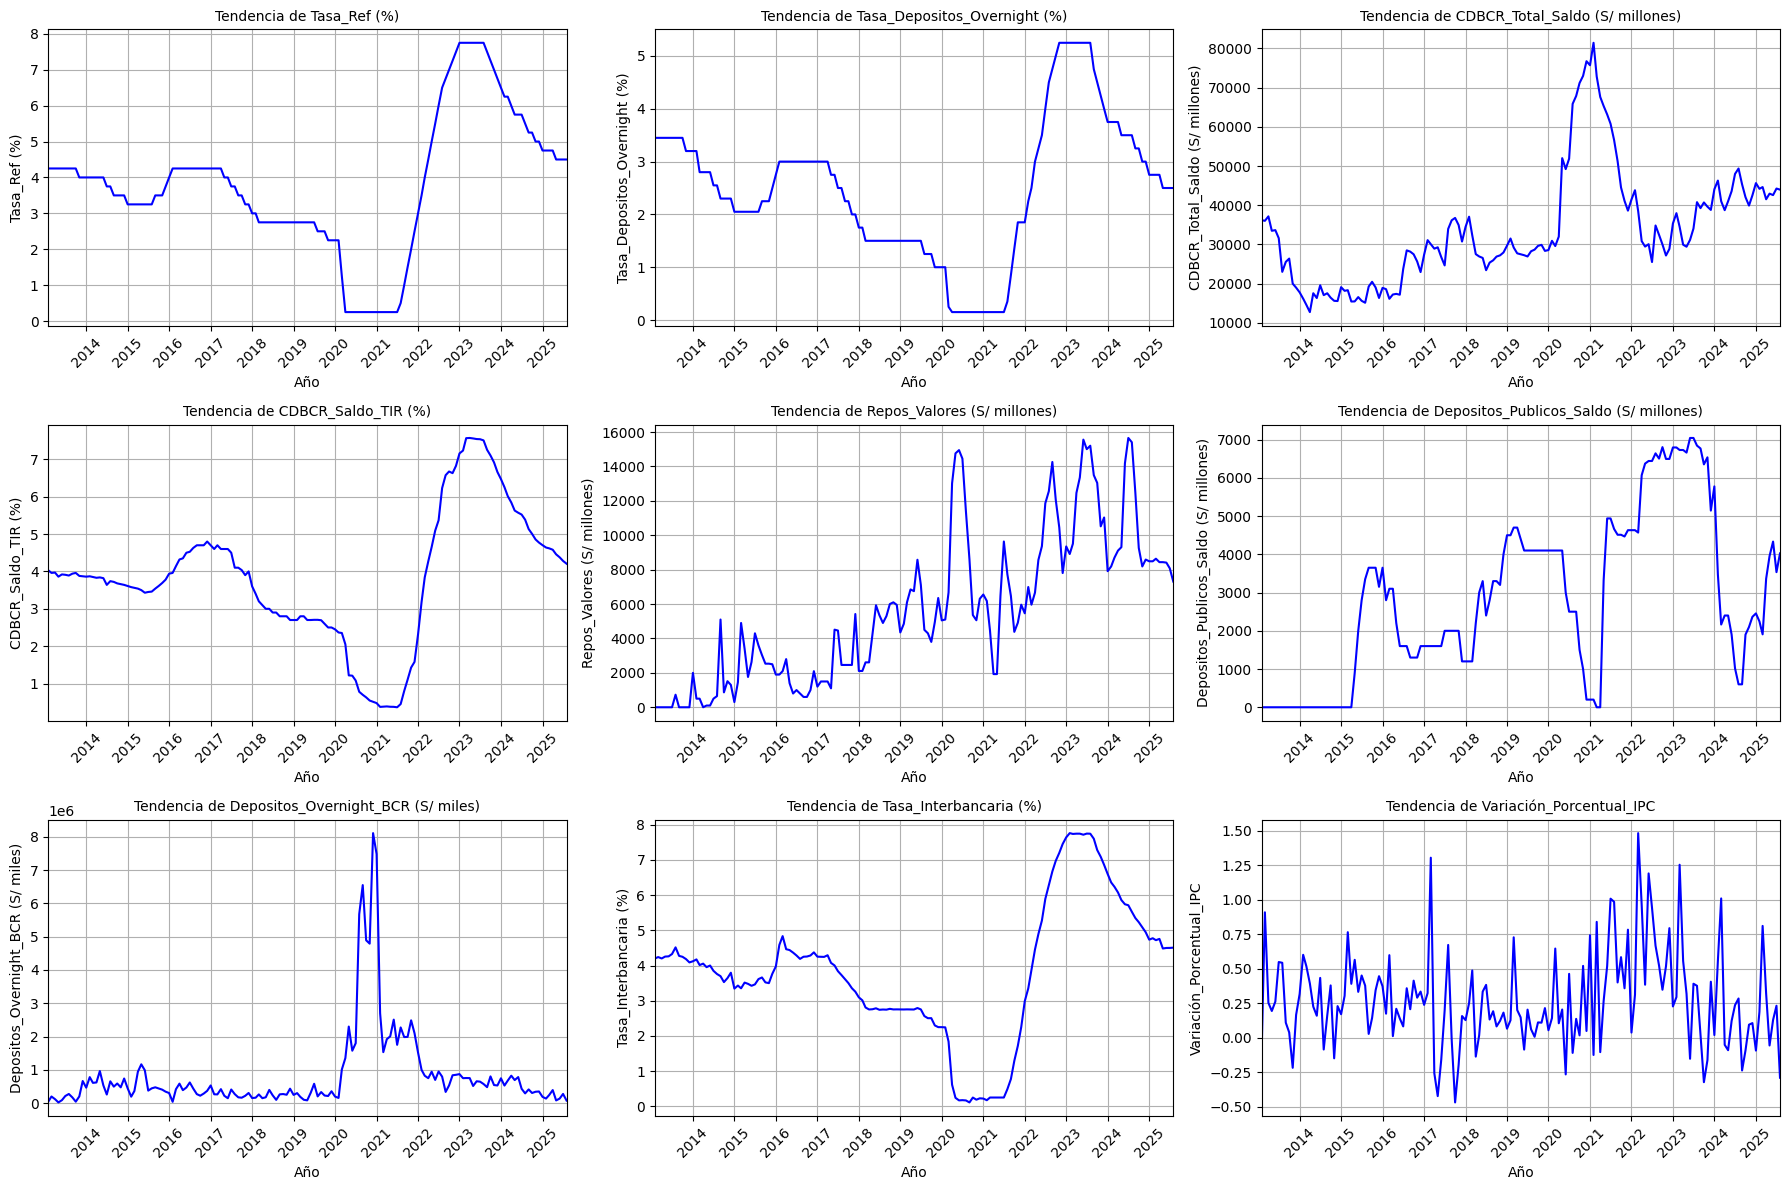

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Crear un diccionario para mapear los meses en espa√±ol al formato en ingl√©s
meses_esp = {
    'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'May': 'May', 'Jun': 'Jun',
    'Jul': 'Jul', 'Ago': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'
}

# Funci√≥n para convertir las fechas en espa√±ol al formato ingl√©s
def convertir_mes(fecha):
    # Solo convertir si no es datetime (para evitar errores)
    if isinstance(fecha, str):
        mes, a√±o = fecha.split('.')
        mes = meses_esp[mes]  # Reemplazar el mes en espa√±ol por su equivalente en ingl√©s
        return f'{mes}.{a√±o}'
    return fecha  # Si ya es datetime, devolverlo tal cual

# Aplicar la funci√≥n a la columna 'Fecha'
df_bcrp['Fecha'] = df_bcrp['Fecha'].apply(convertir_mes)
df_bcrp['Fecha'] = pd.to_datetime(df_bcrp['Fecha'], format='%b.%Y', errors='coerce')

# Definir las columnas num√©ricas de inter√©s, EXCLUYENDO IPC
variables = [col for col in columnas_numericas.columns if col != "IPC"]

# Obtener el rango de fechas del DataFrame
fecha_min = df_bcrp['Fecha'].min()
fecha_max = df_bcrp['Fecha'].max()

# Crear figura con subplots en formato 3x3
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Graficar cada variable en un subplot
for i, var in enumerate(variables):
    axes[i].plot(df_bcrp['Fecha'], df_bcrp[var], linestyle='-', color='b')

    # Configurar el formato del eje X para mostrar solo el a√±o
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axes[i].xaxis.set_major_locator(mdates.YearLocator(1))

    # Limitar el rango del eje X
    axes[i].set_xlim([fecha_min, fecha_max])

    # Ajustes del gr√°fico
    axes[i].set_title(f'Tendencia de {var}', fontsize=10)
    axes[i].set_xlabel('A√±o')
    axes[i].set_ylabel(var)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Eliminar subplots vac√≠os si hay menos de 9 variables
for j in range(len(variables), 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


1. Tasa de Referencia (%)

Se observa una fuerte ca√≠da en 2020, cuando el BCRP redujo la tasa a m√≠nimos hist√≥ricos (0.25%) para contrarrestar los efectos de la pandemia y estimular la liquidez. Posteriormente, desde mediados de 2021 hasta 2023, la tasa se elev√≥ de manera agresiva hasta superar 7%, en respuesta al alza inflacionaria global y local. Desde 2023, se inicia un proceso de reducci√≥n gradual, en l√≠nea con la desaceleraci√≥n de la inflaci√≥n.

2. Tasa de Dep√≥sitos Overnight (%)

Su comportamiento replica estrechamente a la tasa de referencia, confirmando que es un instrumento operativo de corto plazo. La ca√≠da durante la pandemia y el aumento acelerado 2021‚Äì2022 reflejan la funci√≥n del BCRP de transmitir r√°pidamente la postura de pol√≠tica monetaria a la liquidez bancaria.

3. CDBCR Total Saldo (S/ millones)

Se aprecia un incremento notorio en 2020 y 2021, cuando el BCRP intensific√≥ el uso de certificados para manejar el exceso de liquidez generado por programas de apoyo como Reactiva Per√∫. Posteriormente, el saldo muestra una reducci√≥n y mayor volatilidad, asociada a ajustes en la absorci√≥n de liquidez conforme se normalizaba la econom√≠a.

4. CDBCR Saldo TIR (%)

El rendimiento de los CDBCR cae fuertemente durante 2020, en l√≠nea con la baja de la tasa de referencia, y luego sube con fuerza entre 2021‚Äì2022, acompa√±ando el endurecimiento monetario. Su tendencia confirma c√≥mo estos t√≠tulos reflejan directamente la orientaci√≥n de la pol√≠tica monetaria.

5. Repos con Valores (S/ millones)

La serie muestra un incremento progresivo con picos importantes entre 2020 y 2022. Durante la pandemia, el BCRP ampli√≥ las operaciones de reporte para inyectar liquidez al sistema financiero. Los picos de 2021‚Äì2022 reflejan la mayor necesidad de estabilizar la liquidez en medio de la recuperaci√≥n y la volatilidad cambiaria.

6. Dep√≥sitos P√∫blicos Saldo (S/ millones)

Presentan variaciones bruscas y escalonadas, con incrementos notables en 2020‚Äì2021 por las mayores colocaciones del sector p√∫blico en el BCRP. La volatilidad refleja la interacci√≥n entre la pol√≠tica fiscal (mayor gasto en pandemia) y la pol√≠tica monetaria (absorci√≥n de liquidez v√≠a dep√≥sitos).

7. Dep√≥sitos Overnight BCR (S/ miles)

El gr√°fico muestra un salto extraordinario en 2020‚Äì2021, reflejando el uso de este mecanismo para canalizar liquidez de corto plazo. Este aumento est√° directamente asociado a la respuesta del BCRP frente al COVID y a los programas de est√≠mulo, que generaron exceso de liquidez en la banca. Posteriormente, el nivel cae, en l√≠nea con la normalizaci√≥n.

8. Tasa Interbancaria (%)

Se mueve casi en paralelo con la tasa de referencia, confirmando su rol como ‚Äútasa de transmisi√≥n‚Äù de la pol√≠tica monetaria. La ca√≠da en pandemia y el posterior aumento 2021‚Äì2022 replican la estrategia del BCRP. Las leves desviaciones responden a tensiones puntuales de liquidez en el sistema interbancario.

9. Variaci√≥n Porcentual del IPC

El gr√°fico de la variaci√≥n porcentual del IPC muestra una inflaci√≥n mensual vol√°til, con la mayor√≠a de valores dentro de ¬±0.5%, lo que refleja la efectividad del BCRP en mantener la estabilidad de precios en condiciones normales. Los picos al alza (superiores a 1%) corresponden a choques externos como el alza de combustibles y alimentos en 2021‚Äì2022, mientras que las ca√≠das se asociaron a la contracci√≥n de la demanda durante el COVID-19. Seg√∫n la teor√≠a de pol√≠tica monetaria, la tasa de referencia act√∫a con rezagos, de modo que estos choques inmediatos no se corrigen al instante, pero el ajuste contractivo del BCRP en los √∫ltimos a√±os busc√≥ anclar expectativas y devolver la inflaci√≥n al rango meta en el mediano plazo.

### **2. HISTOGRAMAS**

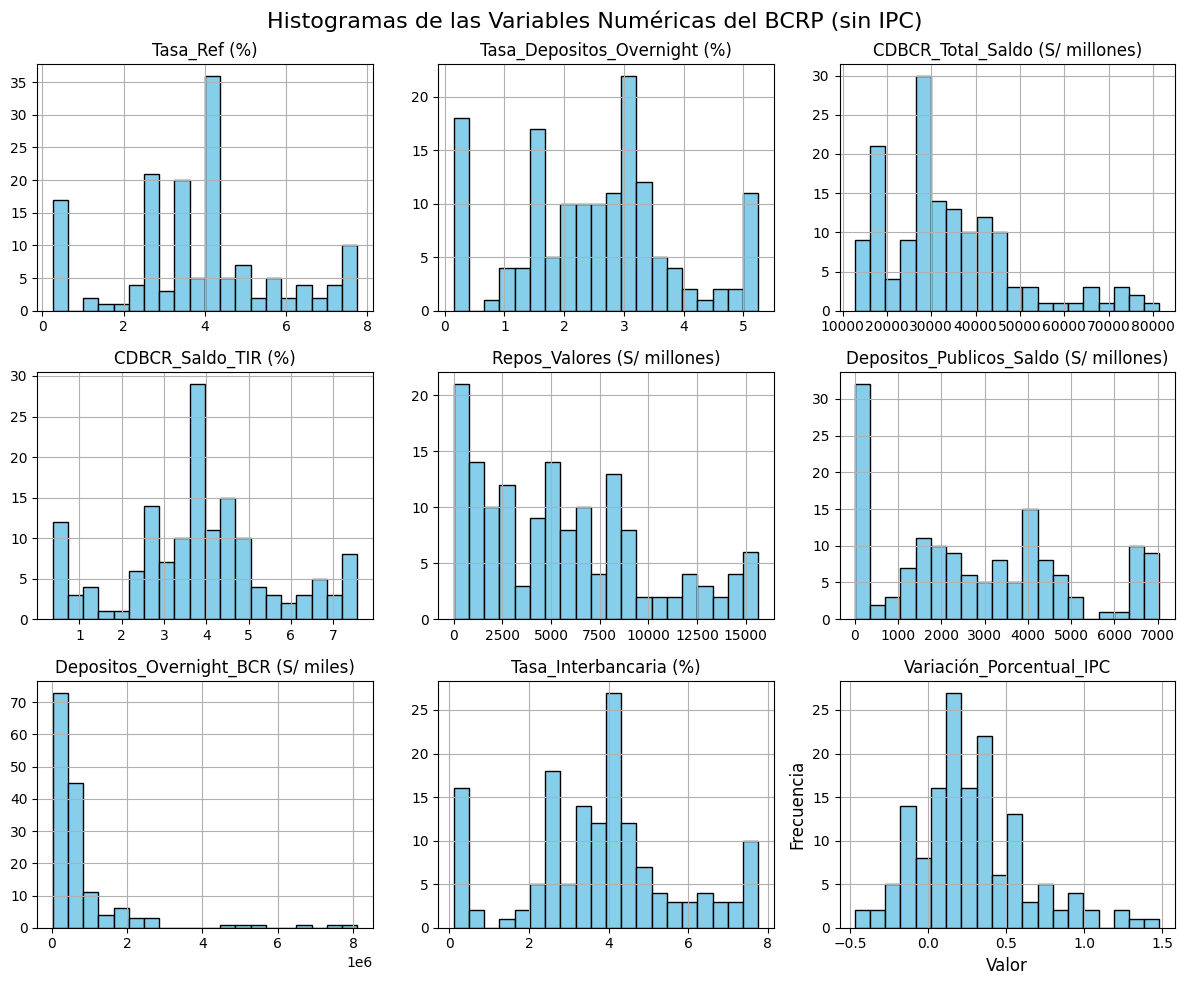

In [ ]:
import matplotlib.pyplot as plt

# Excluir las columnas 'Fecha' y 'IPC' del DataFrame
df_bcrp_sin_fecha = df_bcrp.drop(columns=['Fecha', 'IPC'])

# Generar un histograma para cada variable num√©rica (sin la columna 'Fecha' ni 'IPC')
df_bcrp_sin_fecha.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')

# Ajustar el t√≠tulo y las etiquetas
plt.suptitle('Histogramas de las Variables Num√©ricas del BCRP (sin IPC)', fontsize=16)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()


1. Tasa de Referencia (%)

El histograma muestra mayor frecuencia en valores bajos, alrededor de 2%‚Äì4%, lo que refleja la estabilidad monetaria en la mayor parte del periodo. Sin embargo, tambi√©n se observan frecuencias en niveles altos (6%‚Äì7%) correspondientes al ciclo de endurecimiento monetario 2021‚Äì2022 frente al fuerte repunte inflacionario. Los valores cercanos a 0% representan la pol√≠tica ultraexpansiva aplicada durante la pandemia.

2. Tasa de Dep√≥sitos Overnight (%)

La distribuci√≥n es muy parecida a la de la tasa de referencia, con mayor concentraci√≥n en niveles bajos y moderados. Esto confirma que este instrumento sigue de cerca la tasa de pol√≠tica monetaria. Los valores m√°s bajos reflejan la etapa de expansi√≥n post-COVID, mientras que las frecuencias en torno al 4%‚Äì5% evidencian el ajuste realizado en 2021‚Äì2022 para controlar la inflaci√≥n.

3. CDBCR Total Saldo (S/ millones)

El histograma muestra una fuerte concentraci√≥n entre 20,000 y 40,000 millones, pero con una cola larga hacia la derecha que refleja episodios de expansi√≥n de liquidez, especialmente en 2020 con los programas de est√≠mulo (Reactiva Per√∫). Esto indica que el BCRP utiliz√≥ con fuerza este instrumento en momentos cr√≠ticos para absorber liquidez en exceso.

4. CDBCR Saldo TIR (%)

La mayor parte de la distribuci√≥n se concentra entre 3% y 4.5%, pero tambi√©n aparecen frecuencias en valores cercanos a 1% y 7%, reflejando los extremos de la pol√≠tica monetaria. Los valores bajos corresponden al est√≠mulo del 2020 y los altos al ciclo contractivo del 2022, lo que muestra c√≥mo este instrumento replica los movimientos de la tasa de referencia.

5. Repos con Valores (S/ millones)

Los repos presentan una distribuci√≥n m√°s dispersa, con gran frecuencia en valores bajos, pero tambi√©n con barras altas en niveles intermedios (5,000‚Äì10,000 millones). Esto refleja que en periodos normales son poco utilizados, pero durante la pandemia y la crisis de inflaci√≥n se intensificaron como mecanismo de inyecci√≥n de liquidez.

6. Dep√≥sitos P√∫blicos Saldo (S/ millones)

El histograma revela dos zonas claras: valores bajos cercanos a cero (cuando el sector p√∫blico redujo dep√≥sitos para financiar gasto) y valores altos por encima de 5,000 millones, que reflejan colocaciones extraordinarias de fondos p√∫blicos en el BCRP. Esta dualidad refleja c√≥mo la pol√≠tica fiscal interact√∫a con la pol√≠tica monetaria, afectando la liquidez bancaria.

7. Dep√≥sitos Overnight BCR (S/ miles)

Se observa una concentraci√≥n muy marcada en valores bajos, pero con una cola larga hacia niveles extremadamente altos (superiores al mill√≥n). Esto evidencia que en periodos de normalidad los montos fueron reducidos, pero durante la pandemia y los est√≠mulos del BCRP se registraron picos extraordinarios de liquidez que se canalizaron mediante este instrumento.

8. Tasa Interbancaria (%)

La distribuci√≥n se concentra entre 2% y 4%, en l√≠nea con la tasa de referencia, confirmando su rol como tasa operativa del mercado interbancario. Sin embargo, tambi√©n aparecen frecuencias en valores bajos (0%‚Äì1%) durante la pandemia y valores altos (6%‚Äì8%) durante el ciclo restrictivo 2022, lo que confirma la efectividad de la transmisi√≥n monetaria.

9. Variaci√≥n Porcentual del IPC

El histograma muestra concentraci√≥n alrededor de 0.2%‚Äì0.5% mensual, reflejando una inflaci√≥n estable cercana a la meta de 2% anual. Sin embargo, se observan valores at√≠picos por encima del 1%, correspondientes a los choques inflacionarios 2021‚Äì2022 (alimentos y energ√≠a). Tambi√©n aparecen valores negativos, vinculados a ca√≠das temporales de precios durante los meses m√°s duros del COVID.

### **3.MATRIZ DE CORRELACI√ìN**

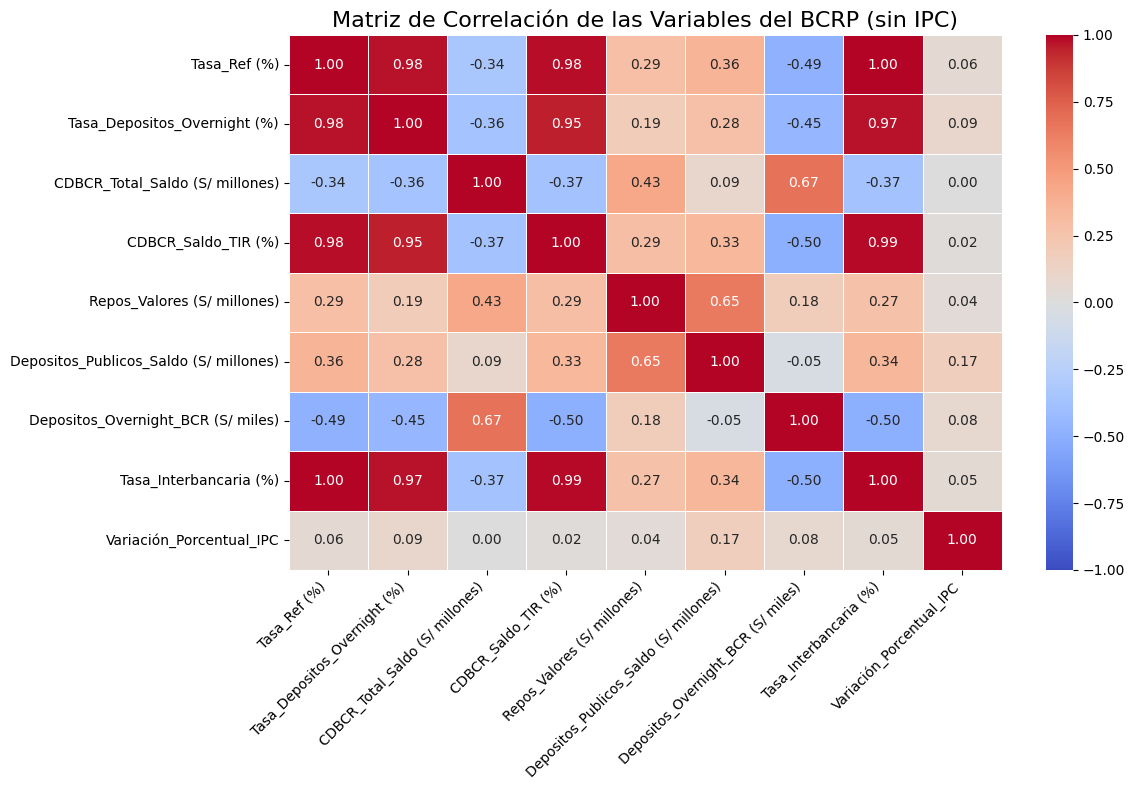

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Excluir las columnas 'Fecha' y 'IPC' para calcular la correlaci√≥n solo con las variables num√©ricas relevantes
df_bcrp_sin_fecha = df_bcrp.drop(columns=['Fecha', 'IPC'])

# Calcular la matriz de correlaci√≥n
correlacion = df_bcrp_sin_fecha.corr()

# Configuraci√≥n del heatmap
plt.figure(figsize=(12, 8))  # Ajustar tama√±o de la figura
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# T√≠tulo y etiquetas
plt.title('Matriz de Correlaci√≥n de las Variables del BCRP (sin IPC)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()


La matriz de correlaci√≥n muestra c√≥mo se relacionan entre s√≠ las principales tasas de pol√≠tica monetaria e instrumentos de mercado que utiliza el BCRP. Los valores cercanos a 1 indican una correlaci√≥n positiva muy fuerte (ambas variables se mueven juntas), mientras que los valores cercanos a -1 implican correlaci√≥n negativa (cuando una sube, la otra tiende a bajar). Los colores rojos reflejan correlaciones altas y positivas, mientras que los azules representan correlaciones negativas.

                (Rojo) Correlaciones positivas fuertes (cercanas a 1)

Tasa de Referencia ‚Äì Tasa Interbancaria (1.00), Dep√≥sitos Overnight (0.98), CDBCR_Saldo_TIR (0.98):
Esto confirma que la tasa de referencia del BCRP se transmite de manera inmediata al resto de tasas del sistema financiero de corto plazo, como establece la teor√≠a de pol√≠tica monetaria. El BCRP busca que sus movimientos de tasa sean el ancla del sistema financiero, y la evidencia muestra que su se√±al se replica en la tasa interbancaria y en las operaciones con CDBCR y dep√≥sitos overnight.

Ejemplo hist√≥rico: en el COVID-19 (2020), todas estas tasas cayeron juntas al m√≠nimo para estimular la econom√≠a.

En cambio, entre 2021‚Äì2023, subieron coordinadamente por el endurecimiento monetario frente al shock inflacionario global.

Repos ‚Äì Dep√≥sitos P√∫blicos (0.65):
Muestra que en periodos de mayor necesidad de liquidez, ambos instrumentos se han movido en paralelo. Es decir, cuando el BCRP inyecta liquidez v√≠a repos, tambi√©n suele observarse un aumento en el manejo de dep√≥sitos p√∫blicos, reflejando la gesti√≥n de liquidez de corto plazo.

                (Azul) Correlaciones negativas (cercanas a -0.5)

Tasa de Referencia / Tasa Interbancaria ‚Äì Dep√≥sitos Overnight en el BCRP (-0.49 a -0.50):
Cuando la tasa de referencia es baja, los bancos prefieren mantener excedentes de liquidez en el BCRP (lo que aumenta los dep√≥sitos overnight). Por el contrario, cuando la tasa sube (pol√≠tica contractiva), los bancos tienden a prestar m√°s caro en el mercado interbancario o en instrumentos como los CDBCR, reduciendo sus excedentes en dep√≥sitos overnight.

Ejemplo: en 2020 (tasa muy baja), hubo abundante liquidez en el sistema y altos saldos en dep√≥sitos overnight. Tras 2021, con el endurecimiento monetario, los saldos en el BCRP disminuyeron, mostrando c√≥mo la pol√≠tica monetaria drena liquidez para contener la inflaci√≥n.

                     Correlaciones d√©biles con el IPC

Variaci√≥n Porcentual del IPC con las tasas (0.02 ‚Äì 0.09):
Aqu√≠ se observa que en el corto plazo la correlaci√≥n directa entre tasas de inter√©s e inflaci√≥n es muy baja. Esto no significa que no exista transmisi√≥n, sino que confirma lo que dice la teor√≠a:

La pol√≠tica monetaria act√∫a con rezagos temporales.

Los shocks inflacionarios recientes (2021‚Äì2022) tuvieron causas externas (alimentos, combustibles, disrupciones log√≠sticas y guerra en Ucrania) que reducen la correlaci√≥n inmediata entre tasas e inflaci√≥n.

El efecto de la tasa se refleja m√°s en las expectativas y en el mediano plazo, no de forma instant√°nea.

### **5.CORRELACION ENTRE PARES DE VARIABLES**

In [ ]:
# Excluir las columnas 'Fecha' y 'IPC' para calcular solo las correlaciones de las variables num√©ricas relevantes
df_bcrp_sin_fecha = df_bcrp.drop(columns=['Fecha', 'IPC'])

# Calcular la matriz de correlaci√≥n
correlacion = df_bcrp_sin_fecha.corr()

# Convertir la matriz de correlaci√≥n en un formato largo (pares de variables)
correlacion_larga = correlacion.unstack()

# Filtrar los pares con correlaci√≥n absoluta mayor a 0.8 (excluyendo correlaci√≥n de 1 consigo misma)
correlacion_fuerte = correlacion_larga[(correlacion_larga.abs() > 0.8) & (correlacion_larga != 1)]

# Ordenar los pares de correlaci√≥n de mayor a menor
correlacion_fuerte = correlacion_fuerte.sort_values(ascending=False)

# Mostrar los pares de variables m√°s correlacionadas
print("Pares de variables con correlaci√≥n m√°s alta (sin IPC):")
print(correlacion_fuerte)


Pares de variables con correlaci√≥n m√°s alta (sin IPC):
Tasa_Ref (%)                  Tasa_Interbancaria (%)          0.997987
Tasa_Interbancaria (%)        Tasa_Ref (%)                    0.997987
CDBCR_Saldo_TIR (%)           Tasa_Interbancaria (%)          0.986241
Tasa_Interbancaria (%)        CDBCR_Saldo_TIR (%)             0.986241
Tasa_Ref (%)                  CDBCR_Saldo_TIR (%)             0.983556
CDBCR_Saldo_TIR (%)           Tasa_Ref (%)                    0.983556
Tasa_Depositos_Overnight (%)  Tasa_Ref (%)                    0.975050
Tasa_Ref (%)                  Tasa_Depositos_Overnight (%)    0.975050
Tasa_Depositos_Overnight (%)  Tasa_Interbancaria (%)          0.972138
Tasa_Interbancaria (%)        Tasa_Depositos_Overnight (%)    0.972138
CDBCR_Saldo_TIR (%)           Tasa_Depositos_Overnight (%)    0.950884
Tasa_Depositos_Overnight (%)  CDBCR_Saldo_TIR (%)             0.950884
dtype: float64


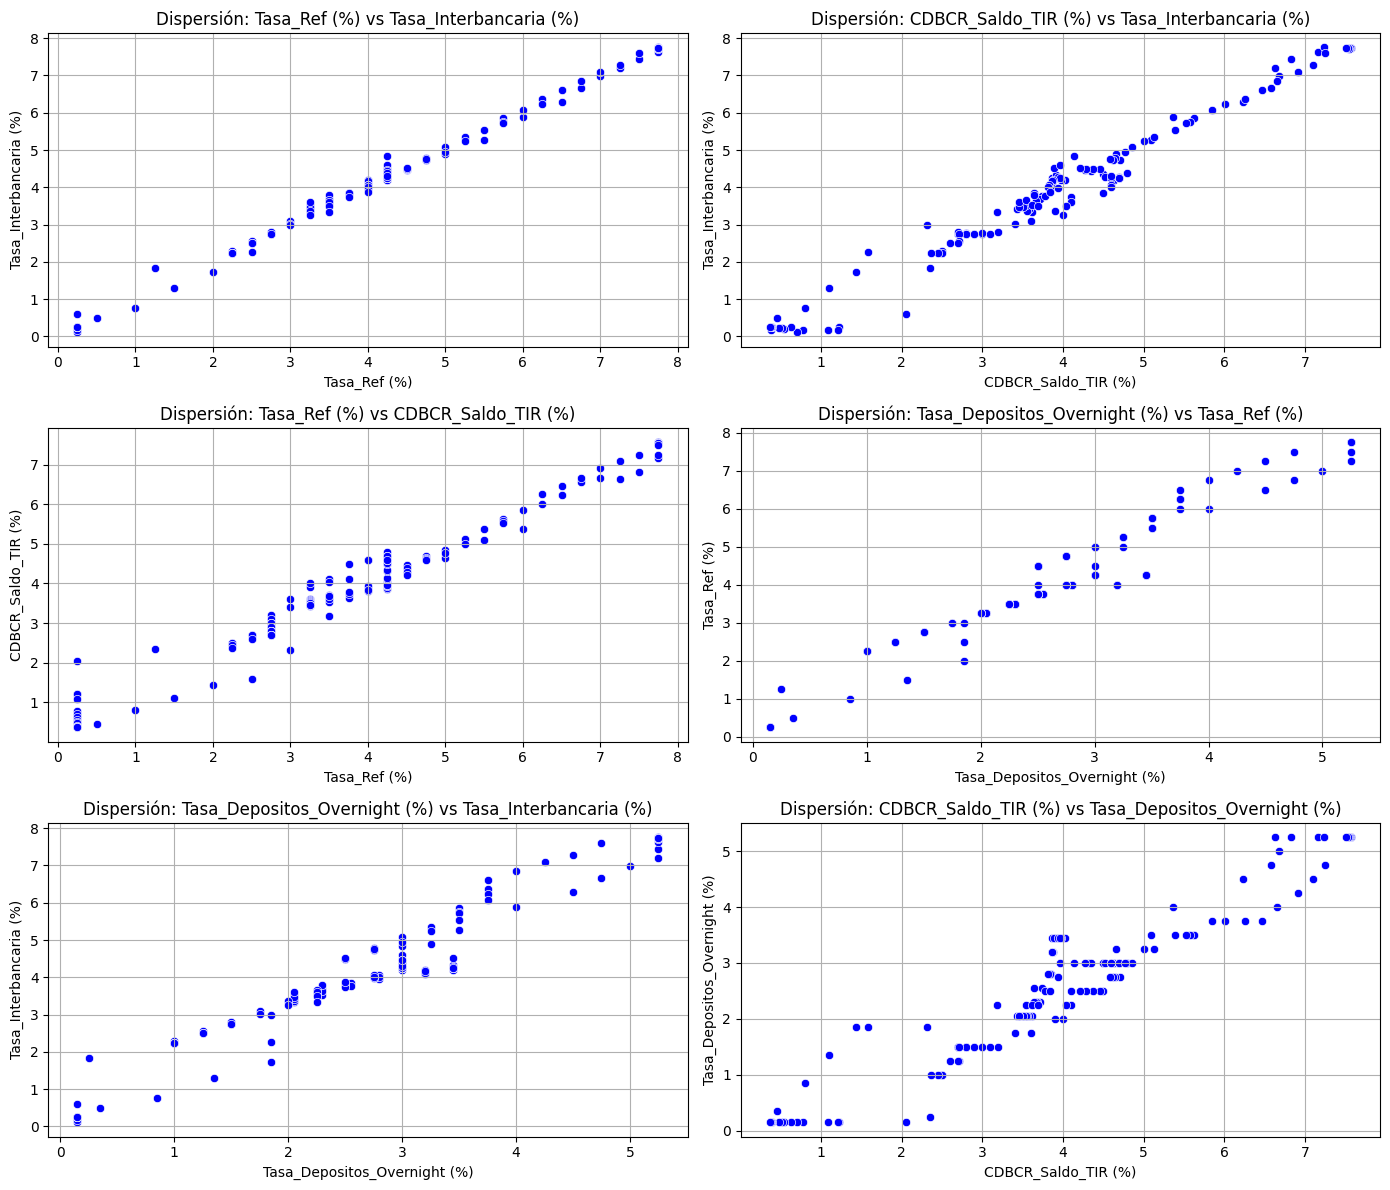

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de pares de variables con mayor correlaci√≥n (sin duplicados y sin IPC)
pares_correlacionados = [
    ('Tasa_Ref (%)', 'Tasa_Interbancaria (%)'),
    ('CDBCR_Saldo_TIR (%)', 'Tasa_Interbancaria (%)'),
    ('Tasa_Ref (%)', 'CDBCR_Saldo_TIR (%)'),
    ('Tasa_Depositos_Overnight (%)', 'Tasa_Ref (%)'),
    ('Tasa_Depositos_Overnight (%)', 'Tasa_Interbancaria (%)'),
    ('CDBCR_Saldo_TIR (%)', 'Tasa_Depositos_Overnight (%)')
]

# Crear figura con subplots en formato 3x2
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()  # Aplanar para iterar f√°cilmente

# Crear gr√°ficos de dispersi√≥n para cada par
for i, (var1, var2) in enumerate(pares_correlacionados):
    sns.scatterplot(x=df_bcrp[var1], y=df_bcrp[var2], color='blue', ax=axes[i])
    axes[i].set_title(f'Dispersi√≥n: {var1} vs {var2}', fontsize=12)
    axes[i].set_xlabel(var1, fontsize=10)
    axes[i].set_ylabel(var2, fontsize=10)
    axes[i].grid(True)

# Eliminar subplots vac√≠os (si hubiera)
for j in range(len(pares_correlacionados), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


1. Dispersi√≥n: Tasa de Referencia (%) vs Tasa Interbancaria (%)

El gr√°fico evidencia una relaci√≥n casi lineal y positiva, lo que refleja que la Tasa Interbancaria sigue de cerca los movimientos de la Tasa de Referencia, cumpliendo el objetivo central del BCRP: alinear las condiciones del mercado monetario con su se√±al de pol√≠tica monetaria. Durante la pandemia de COVID-19 (2020), ambas tasas cayeron a m√≠nimos hist√≥ricos (alrededor de 0.25%‚Äì0.5%), mostrando la pol√≠tica altamente expansiva para estimular cr√©dito y consumo. Posteriormente, en el periodo 2021‚Äì2023, ambas tasas subieron de manera sincronizada hasta superar el 7%, en un contexto de inflaci√≥n importada por alimentos, combustibles y disrupciones globales, evidenciando la pol√≠tica contractiva para frenar el sobrecalentamiento y corregir expectativas inflacionarias.

2. Dispersi√≥n: CDBCR_Saldo_TIR (%) vs Tasa Interbancaria (%)

El gr√°fico muestra tambi√©n una relaci√≥n positiva y muy estrecha: cuando sube la Tasa de Inter√©s de los CDBCR, la Tasa Interbancaria acompa√±a el movimiento. Esto confirma el papel de los Certificados de Dep√≥sito BCRP como instrumento clave de absorci√≥n de liquidez y de transmisi√≥n de la pol√≠tica monetaria hacia el mercado. En periodos de liquidez abundante (como el 2020), ambas tasas se ubicaron en niveles bajos, mientras que en la fase de endurecimiento (2021‚Äì2023) aumentaron de manera coordinada. Esto refleja que el BCRP no solo usa la tasa de referencia como gu√≠a, sino tambi√©n instrumentos de mercado abierto (CDBCR) para reforzar su control sobre la liquidez y las expectativas inflacionarias.

3. Dispersi√≥n: Tasa de Referencia (%) vs CDBCR_Saldo_TIR (%)

Aqu√≠ se observa una correlaci√≥n casi perfecta, evidenciando que las tasas de los CDBCR est√°n directamente determinadas por la Tasa de Referencia. Esto se explica por la teor√≠a de pol√≠tica monetaria: el BCRP subasta los CDBCR ajustando sus tasas al nivel de referencia, de modo que el sistema financiero internalice la se√±al de pol√≠tica. En el periodo 2020, ambas tasas estuvieron en m√≠nimos (expansi√≥n monetaria), mientras que tras el shock inflacionario global (2021‚Äì2023) ambas se elevaron, reforzando la transmisi√≥n de la pol√≠tica. Esto muestra c√≥mo el BCRP utiliza el mercado de valores como canal operativo para llevar su postura de pol√≠tica al sistema financiero.

4. Dispersi√≥n: Tasa Dep√≥sitos Overnight (%) vs Tasa de Referencia (%)

El gr√°fico confirma que la Tasa de Dep√≥sitos Overnight sigue de manera estrecha la evoluci√≥n de la Tasa de Referencia, ya que este instrumento es la tasa que remunera los excesos de liquidez de los bancos depositados en el BCRP. Durante el COVID-19, ambas cayeron dr√°sticamente, reflejando la intenci√≥n del BCRP de abaratar el costo de oportunidad de mantener liquidez y fomentar cr√©dito. En la fase 2021‚Äì2023, el alza de la tasa de referencia se transmiti√≥ autom√°ticamente a los dep√≥sitos overnight, mostrando c√≥mo las condiciones de liquidez bancaria se ajustan casi instant√°neamente a los cambios de pol√≠tica monetaria. Esto refuerza el papel de la tasa de referencia como ancla de corto plazo en la econom√≠a.

5. Dispersi√≥n: Tasa Dep√≥sitos Overnight (%) vs Tasa Interbancaria (%)

El gr√°fico muestra un ajuste casi lineal, confirmando que tanto la tasa interbancaria como la de dep√≥sitos overnight responden simult√°neamente a la pol√≠tica monetaria. Cuando el BCRP inyecta liquidez (ej. 2020), ambas tasas convergen a valores muy bajos, facilitando financiamiento barato en el mercado. Cuando el BCRP absorbe liquidez y endurece pol√≠tica (2021‚Äì2023), ambas suben en sincron√≠a, reflejando un encarecimiento generalizado del cr√©dito. Esto confirma que la pol√≠tica monetaria afecta tanto a las operaciones de corto plazo entre bancos (interbancaria) como a los incentivos de los bancos para mantener liquidez en el BCRP (overnight), dos canales esenciales de transmisi√≥n hacia la econom√≠a real.

6. Dispersi√≥n: CDBCR_Saldo_TIR (%) vs Tasa Dep√≥sitos Overnight (%)

Este gr√°fico revela una relaci√≥n igualmente positiva, ya que ambas variables responden de manera directa a los movimientos de la Tasa de Referencia. Los CDBCR (que absorben liquidez a plazos m√°s largos) y los dep√≥sitos overnight (exceso de liquidez inmediata) son complementarios en la caja de herramientas del BCRP. En √©pocas de expansi√≥n (COVID-19), ambas tasas estuvieron deprimidas, lo que signific√≥ liquidez barata y abundante. En cambio, en el ciclo de alza de tasas 2021‚Äì2023, ambas se elevaron, mostrando c√≥mo el BCRP busc√≥ controlar tanto la liquidez inmediata como las expectativas a plazos m√°s largos. Esto refuerza la idea de que la pol√≠tica monetaria del BCRP opera a trav√©s de m√∫ltiples canales de transmisi√≥n, todos alineados con el objetivo de controlar la inflaci√≥n.